In [1]:
# Importando as bibliotecas necessarias 
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
conn = sql.connect('autos')

In [3]:
autos = pd.read_sql('SELECT * FROM autos', conn)

In [ ]:
autos.head(n=6)

In [4]:
autos = autos.dropna()

In [ ]:
len(autos)

In [ ]:
autos.duplicated()

In [5]:
autos = autos.drop_duplicates()

In [ ]:
len(autos)

In [6]:
autos.isnull().sum()

name                  0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
fuelType              0
brand                 0
dtype: int64

In [ ]:
autos.dtypes

In [7]:
#Filtrando os carros registrados após 2010
autos = autos.query("yearOfRegistration>2010")

In [ ]:
len(autos)

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

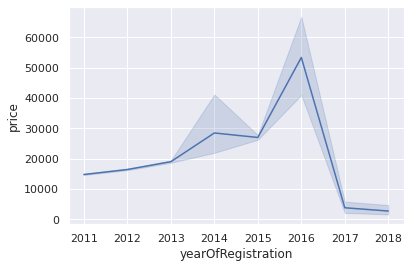

In [17]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("autos")

# Plot the responses for different events and regions
sns.lineplot(x="yearOfRegistration", y="price",
             data=autos)

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="price", y="name", data=autos,
            label="Total", color="b")


In [4]:
data = (autos.groupby('brand')["powerPS"].agg(lambda x: list(x)))

In [8]:
data.index

Index(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant', 'volkswagen',
       'volvo'],
      dtype='object', name='brand')

In [6]:
pandas.index(['audi','bmw','citroen','ford','mercedes_benz','opel','peugeot','porsche','renault','volkswagen','mazda'], dtype='object', name='brand')

NameError: name 'pandas' is not defined

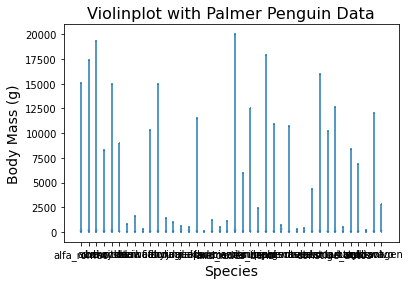

In [9]:
labels = data.index
fig, ax = plt.subplots()
# make violinplot
ax.violinplot(data)
# set x-axis tick labels
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
plt.xlabel("Species",
            size=14)
plt.ylabel("Body Mass (g)", 
            size=14)
plt.title("Violinplot with Palmer Penguin Data", 
            size=16)
plt.savefig("Violinplot_matplotlib_python.png",
                    format='png',dpi=150)